In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle


Load mapping dictionaries to take states to their 2 char codes and vice versa.

In [2]:
with open('state_2_code.p', 'rb') as fp:
    state_2_code = pickle.load(fp)

In [3]:
with open('code_2_state.p', 'rb') as fp:
    code_2_state = pickle.load(fp)

Load each year's data and set the appropriate year in the year column

In [4]:
df_2005 = pd.read_csv('vet_2005.csv')
df_2005['year'] = pd.Series(2005, index=df_2005.index)

df_2006 = pd.read_csv('vet_2006.csv')
df_2006['year'] = pd.Series(2006, index=df_2006.index)

df_2007 = pd.read_csv('vet_2007.csv')
df_2007['year'] = pd.Series(2007, index=df_2007.index)

df_2008 = pd.read_csv('vet_2008.csv')
df_2008['year'] = pd.Series(2008, index=df_2008.index)

df_2009 = pd.read_csv('vet_2009.csv')
df_2009['year'] = pd.Series(2009, index=df_2009.index)

df_2010 = pd.read_csv('vet_2010.csv')
df_2010['year'] = pd.Series(2010, index=df_2010.index)

df_2011 = pd.read_csv('vet_2011.csv')
df_2011['year'] = pd.Series(2011, index=df_2011.index)

In [5]:
#Combine into one dataframe

frames = [df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011]
df_vets = pd.concat(frames)
df_vets = df_vets.drop(df_vets.columns[0], axis=1)

In [6]:
print(len(df_vets))

350


In [7]:
df_vets.head()

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,...,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,22.0,0.916667,2.0,...,NaN,9.0,NaN,NaN,5.0,NaN,4.0,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,79.0,0.975309,2.0,...,NaN,NaN,NaN,NaN,16.0,NaN,25.0,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,613.0,0.968404,20.0,...,NaN,NaN,NaN,220.0,NaN,NaN,317.0,28.860147,11.019220,2005


In [8]:
print(df_vets.columns)

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_males', 'vet_males_p',
       'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34',
       'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49',
       'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64',
       'vet_60', 'vet_65', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


Drop age range columnns, there are too many na values in these columns to reliably report on them. 

In [9]:
drop_col = ['vet_males', 'vet_males_p', 'vet_females', 'vet_females_p', 'vet_15_24', 'vet_18_29', 'vet_17_34', 'vet_25_34', 'vet_30_39', 'vet_25_44', 'vet_35_44', 'vet_40_49', 'vet_35-54', 'vet_45_54', 'vet_50_59', 'vet_45_64', 'vet_55_64', 'vet_60', 'vet_65']
df_vets = df_vets.drop(drop_col, axis=1)

In [10]:
print(df_vets.columns)
df_vets.head()

Index(['state', 'vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_rate', 'civ_rate', 'year'],
      dtype='object')


,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year
0,Alabama,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005
1,Alaska,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005
2,Arizona,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005
4,California,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005


Calculate figures strictly for the civilian population to compare with vets

In [11]:
df_vets['civ_pop'] = df_vets['overall_pop_18'] - df_vets['vet_pop']
df_vets['civ_suicides'] = df_vets['all_suicides'] - df_vets['vet_suicides']
df_vets['civ_suicides_p'] = df_vets['civ_suicides'] / df_vets['civ_pop']

Clean out asterisks from state names so that we can use the mapping dictionary. 

In [12]:
df_vets['state'] = df_vets.state.str.replace('*' , '')

print(df_vets.state.unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Find means and medians between vet and civ population

In [13]:
for year in range(2005, 2012):
    print(f'{year} vet suicide mean: {df_vets.loc[df_vets["year"] == year]["vet_suicides"].mean()} \t median: {df_vets.loc[df_vets["year"] == year]["vet_suicides"].median()}')
    
print('\n')

for year in range(2005, 2012):
    print(f'{year} civ suicide mean: {df_vets.loc[df_vets["year"] == year]["civ_suicides"].mean()} \t median: {df_vets.loc[df_vets["year"] == year]["civ_suicides"].median()}')

2005 vet suicide mean: 136.92 	 median: 98.5
2006 vet suicide mean: 130.02 	 median: 93.5
2007 vet suicide mean: 136.24 	 median: 93.5
2008 vet suicide mean: 143.4 	 median: 96.5
2009 vet suicide mean: 145.64 	 median: 100.5
2010 vet suicide mean: 145.0 	 median: 104.5
2011 vet suicide mean: 146.92 	 median: 109.0


2005 civ suicide mean: 515.16 	 median: 405.0
2006 civ suicide mean: 535.38 	 median: 415.5
2007 civ suicide mean: 555.0 	 median: 434.0
2008 civ suicide mean: 576.44 	 median: 431.0
2009 civ suicide mean: 591.96 	 median: 465.0
2010 civ suicide mean: 621.46 	 median: 496.0
2011 civ suicide mean: 617.94 	 median: 491.5


In [14]:
nat_vet_suicide_by_year = df_vets.groupby('year')['vet_suicides'].sum()
nat_civ_suicide_by_year = df_vets.groupby('year')['civ_suicides'].sum()
#nat_population_by_year = df_vets.groupby('year')['overall_pop_18'].sum()

Show national trend of veteran suicide compared to civ suicide over time period. 

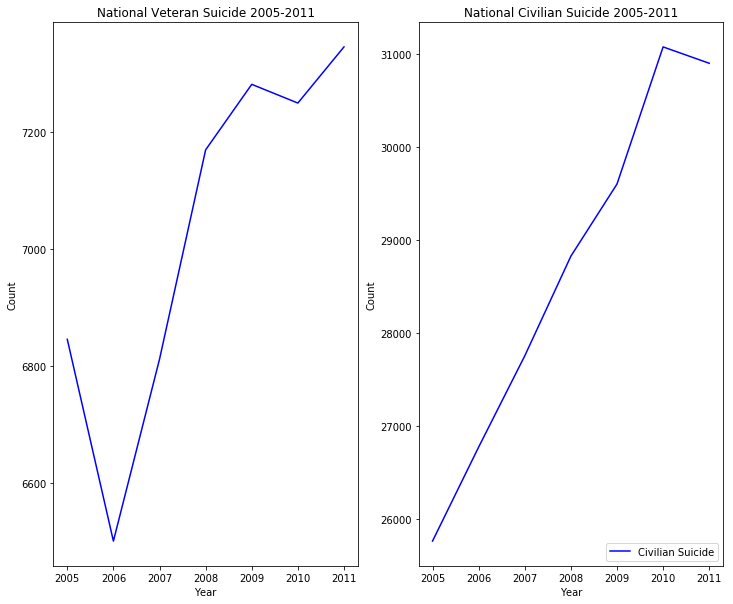

In [15]:
plt.figure(figsize=(12,10))
plt.legend(loc='lower right')


ax = plt.subplot(1,2,1)
ax.set_title('National Veteran Suicide 2005-2011')
ax.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

ax = plt.subplot(1,2,2)
ax.set_title('National Civilian Suicide 2005-2011')
ax.plot(nat_civ_suicide_by_year, color='b', label = 'Civilian Suicide')
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend(loc='lower right')

Show same trend on the same graph

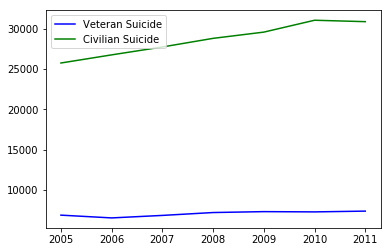

In [16]:
plt.plot(nat_vet_suicide_by_year, color='b', label = 'Veteran Suicide')
plt.plot(nat_civ_suicide_by_year, color='g', label = 'Civilian Suicide')
plt.legend(loc='upper left')

In [17]:
vet_pop_2005 = df_vets[df_vets['year'] == 2005]
vet_pop_2005.loc[:,'state'] = vet_pop_2005.loc[:'state'].replace({'state': state_2_code})
vet_pop_2005 = vet_pop_2005.set_index('state')
print(vet_pop_2005.columns)

Index(['vet_pop', 'overall_pop_18', 'vet_pop_p', 'vet_suicides',
       'all_suicides', 'vet_suicides_p', 'vet_rate', 'civ_rate', 'year',
       'civ_pop', 'civ_suicides', 'civ_suicides_p'],
      dtype='object')


/home/dang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
def plot_pop_vs_suicide(df, year):
    plt.figure(figsize=(12,10))
    plt.subplot(3, 1, 1)
    x = range(50)
    plt.bar(x, df['vet_pop'])
    plt.xticks([], [])
    plt.title(f'{year} Veteran Population Compared to Veteran Suicide Rate')
    plt.legend(['Veteran Population'])

    plt.subplot(3, 1, 2)
    plt.bar(x, df['vet_suicides'])
    plt.xticks([], [])
    plt.legend(['Veteran suicides'])


    plt.subplot(3, 1, 3)
    plt.bar(x, df['vet_suicides_p'])
    plt.xticks(x, df.index.values, rotation='vertical')
    plt.legend(['Veteran suicide rates'])

    plt.show()

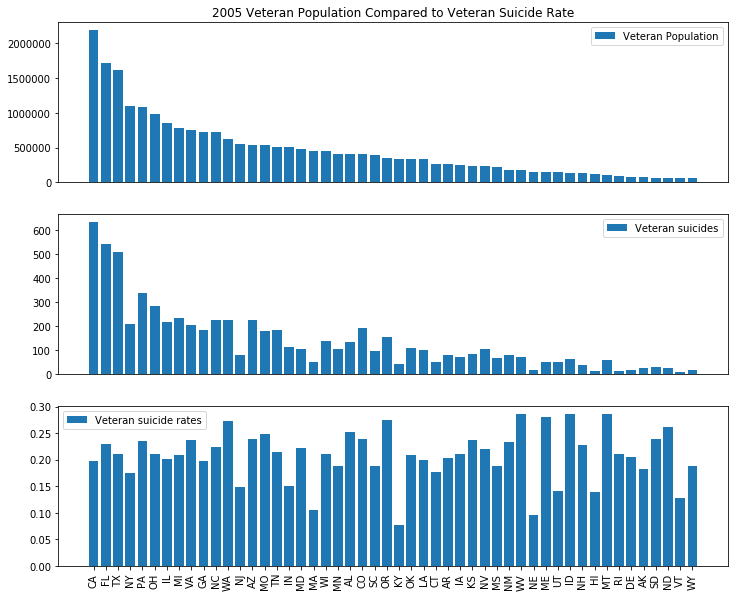

In [19]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_pop'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

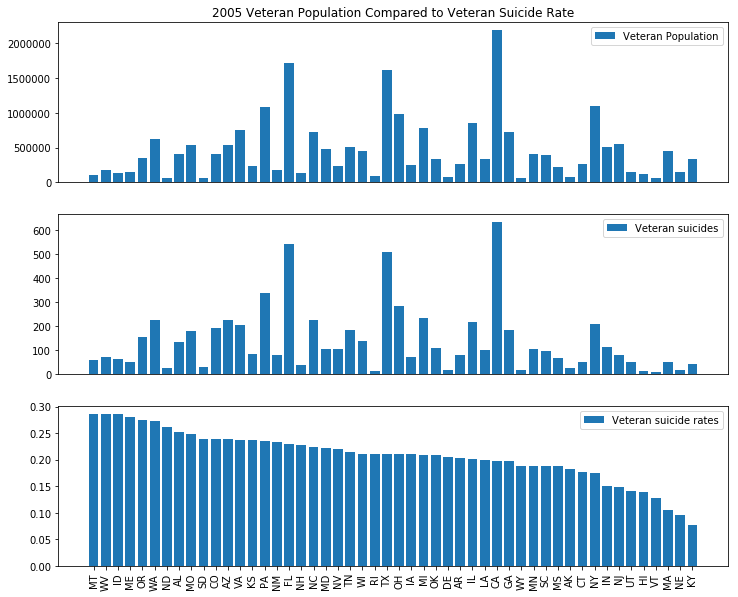

In [20]:
vet_pop_2005 = vet_pop_2005.sort_values(by=['vet_suicides_p'], ascending=False)
plot_pop_vs_suicide(vet_pop_2005, 2005)

Load MHI Data

In [21]:
df_mhi = pd.read_json('Clean_Data/median_household_income_normalized.json')

In [22]:
df_mhi.columns

Index(['1984 (19)', '1985 (20)', '1986', '1987 (21)', '1988', '1989', '1990',
       '1991', '1992 (22)', '1993 (23)', '1994 (24)', '1995 (25)', '1996',
       '1997', '1998', '1999 (29)', '2000 (30)', '2001', '2002', '2003',
       '2004(revised)', '2005', '2006', '2007', '2008', '2009 (36)',
       '2010 (37)', '2011', '2012', '2013 (38)', '2013 (39)', '2014', '2015',
       '2016', 'State'],
      dtype='object')

In [23]:
df_mhi.head()

,1984 (19),1985 (20),1986,1987 (21),1988,1989,1990,1991,1992 (22),1993 (23),...,2009 (36),2010 (37),2011,2012,2013 (38),2013 (39),2014,2015,2016,State
1,49335,50258,52068,52690,53124,54042,53350,51791,51390,51116,...,55683,54245,53401,53331,53518,55214,54398,57230,59039,United States
10,44918,44849,50866,55508,52180,50015,48805,51377,50738,44675,...,59446,62669,58946,68206,62519,61882,69219,70956,70982,D.C.
11,43547,45417,47785,49512,49575,48768,47545,46851,45877,46713,...,51045,48510,48121,48161,49341,50007,46777,49442,51176,Florida
12,43985,44791,50966,54010,51838,51492,49106,46782,48306,51807,...,48483,48566,49047,50304,48881,48420,50239,51410,53527,Georgia
13,63558,61627,60655,70807,64440,65500,69346,64032,70642,69803,...,62252,65543,62995,58815,63274,66187,72206,65329,72133,Hawaii


In [24]:
df_mhi.index.values

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52,  6,  7,  8,
        9])

In [25]:
df_mhi = df_mhi[['2005', '2006', '2007', '2008', '2009 (36)', '2010 (37)', '2011', 'State']]
# df.rename(index=str, columns={"A": "a", "C": "c"})
df_mhi = df_mhi.rename(index=str, columns={"State": "state", "2009 (36)": "2009", "2010 (37)": "2010"})

In [26]:
print(df_mhi.columns)

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', 'state'], dtype='object')


In [27]:
#TODO: merge MHI data into df_vets by state then by year. 
df_vets_joined = df_vets 
for year in range(2005, 2012):
    temp = df_mhi[[str(year), 'state']]
    print(temp.head())
    df_vets_joined['mhi'] = pd.merge(df_vets, temp, on='state', how='left')

df_vets_joined.head()

     2005          state
1   56935  United States
10  55296           D.C.
11  52835        Florida
12  56443        Georgia
13  73231         Hawaii
     2006          state
1   57379  United States
10  57708           D.C.
11  54373        Florida
12  58740        Georgia
13  71984         Hawaii
     2007          state
1   58149  United States
10  58786           D.C.
11  53010        Florida
12  56306        Georgia
13  74111         Hawaii
     2008          state
1   56076  United States
10  61970           D.C.
11  50005        Florida
12  51532        Georgia
13  68581         Hawaii
     2009          state
1   55683  United States
10  59446           D.C.
11  51045        Florida
12  48483        Georgia
13  62252         Hawaii
     2010          state
1   54245  United States
10  62669           D.C.
11  48510        Florida
12  48566        Georgia
13  65543         Hawaii
     2011          state
1   53401  United States
10  58946           D.C.
11  48121        Florida


,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_rate,civ_rate,year,civ_pop,civ_suicides,civ_suicides_p,2011
0,Alabama,403950,3344721,0.120772,135,535,0.252336,33.419978,13.601875,2005,2940771,400,0.000136,45438
1,Alaska,74482,446969,0.166638,24,131,0.183206,32.222550,28.725835,2005,372487,107,0.000287,61271
2,Arizona,538880,4238996,0.127124,225,945,0.238095,41.753266,19.458849,2005,3700116,720,0.000195,51872
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,31.237466,18.078622,2005,1764515,319,0.000181,44064
4,California,2193336,25543447,0.085867,633,3206,0.197442,28.860147,11.019220,2005,23350111,2573,0.000110,56936
